In [1]:
%run -i 'cosim_import.py'
import csv
import multiprocessing

0.post4576.dev0+gfe71f06
2.8.0


In [2]:
# case parameters
case_name = 'ieee39'
caseH = 18
ict = True
ecc = False
agc = True
t_total = 3600

%run -i 'cosim_setup_andes.py'

sse0 = ev_ssm(ts=caseH, N=50000, step=1, tp=20,
              lr=0.1, lp=60, seed=2022, name="EVA",
              n_pref=1, is_report=True,
              tt_mean=0.2, tt_var=0.05, tt_lb=0, tt_ub=0.4,
              ict=ict, ecc=ecc, agc=agc)

EVA: ts=18[H], 50000 EVs, Total Q=434.54 MWh
Online 14477, Q=362.27 MWh, SoC=0.7435
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=0.0
Ctrl: 0=7897; 1=6580; 
EVA: Load A from Aest.csv.


Generating code for 1 models on 8 processes.


EVA: ts=18[H], 50000 EVs, Total Q=434.54 MWh
Online 14477, Q=362.27 MWh, SoC=0.7435
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=0.0
Ctrl: 0=7897; 1=6580; 


In [3]:
%run -i 'cosim_loadsyn.py'

ANDES total load is: 58.564 p.u.


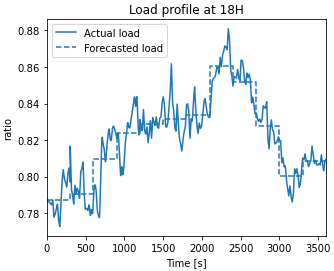

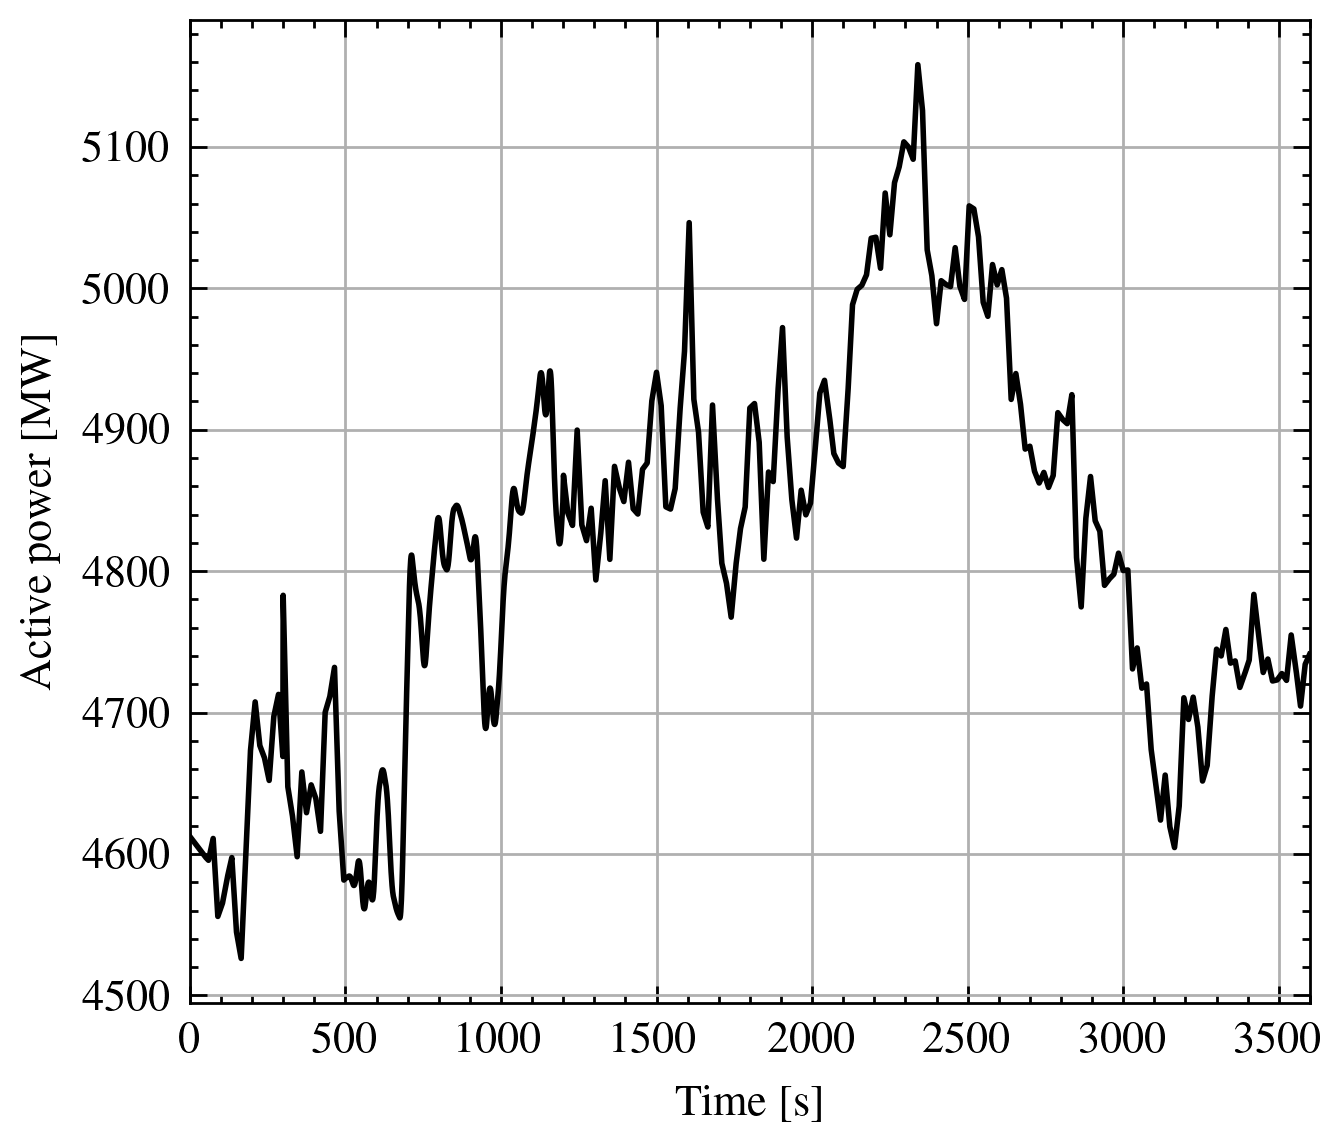

In [4]:
plt.style.use(['science','ieee'])
# --- plot load curve ---
fig_load, ax_load = plt.subplots(figsize=(3.5, 3), dpi=400)
ax_load.plot(d_syn['time'], ptotal * ssa.config.mva * d_syn['sload'], linestyle='-')
ax_load.grid(visible=True, which='major', ls='-')
ax_load.set_xlim([0, 3600])
ax_load.set_ylabel('Active power [MW]')
ax_load.set_xlabel('Time [s]')
# ax_load.set_title('Figure. Load profile', fontsize=12, x=0, y=-0.4)
plt.tight_layout()
# fig_load.savefig("load_curve.png", bbox_inches="tight")
fig_load.savefig('fig_load.eps', format='eps')

In [5]:
%run -i 'cosim_setup_dispatch.py'

Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-08


RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED limited: sfru, sfrd
RTED: total cost=4889.131


<Figure size 1980x1500 with 0 Axes>

In [6]:
case_name = 'cosim_ieee39_'

# SFR, with ict control
socf1 = pd.read_csv(case_name+'fict'+'_evsoc1.csv')
socf2 = pd.read_csv(case_name+'fict'+'_evsoc2.csv')
socfm = pd.concat([socf1, socf2], axis=0).reset_index(drop=True)

# SFR, without ict control
socfn1 = pd.read_csv(case_name+'f'+'_evsoc1.csv')
socfn2 = pd.read_csv(case_name+'f'+'_evsoc2.csv')
socfnm = pd.concat([socfn1, socfn2], axis=0).reset_index(drop=True)

# no SFR
socs1 = pd.read_csv(case_name+'s'+'_evsoc1.csv')
socs2 = pd.read_csv(case_name+'s'+'_evsoc2.csv')
socsm = pd.concat([socs1, socs2], axis=0).reset_index(drop=True)

pgf = pd.read_csv(case_name+'fict'+'_pg.csv')
pgs = pd.read_csv(case_name+'s'+'_pg.csv')
pgfn = pd.read_csv(case_name+'f'+'_pg.csv')

agcf = pd.read_csv(case_name+'fict'+'_agcm.csv')
agcs = pd.read_csv(case_name+'s'+'_agcm.csv')
agcfn = pd.read_csv(case_name+'f'+'_agcm.csv')

outf = pd.read_csv(case_name+'fict'+'_out.csv')
outs = pd.read_csv(case_name+'s'+'_out.csv')
outfn = pd.read_csv(case_name+'f'+'_out.csv')
outf['fd'] = outf['freq'] - ssa.config.freq
outs['fd'] = outs['freq'] - ssa.config.freq
outfn['fd'] = outfn['freq'] - ssa.config.freq

evf = pd.read_csv(case_name+'fict'+'_sse.csv')
evs = pd.read_csv(case_name+'s'+'_sse.csv')
evfn = pd.read_csv(case_name+'f'+'_sse.csv')

evdf = pd.read_csv(case_name+'fict'+'_evdata.csv')
evds = pd.read_csv(case_name+'s'+'_evdata.csv')
evdfn = pd.read_csv(case_name+'f'+'_evdata.csv')

sfrf = pd.read_csv(case_name+'fict'+'_sfr.csv')
sfrs = pd.read_csv(case_name+'s'+'_sfr.csv')
sfrfn = pd.read_csv(case_name+'f'+'_sfr.csv')

evagcf = pd.read_csv(case_name+'fict'+'_evagc.csv').T
evsocf = socfm.T
evsocf.sort_values(by=['0'], axis=1, inplace=True)
evagcs = pd.read_csv(case_name+'s'+'_evagc.csv').T
evsocs = socsm.T
evsocs.sort_values(by=['0'], axis=1, inplace=True)
evagcfn = pd.read_csv(case_name+'f'+'_evagc.csv').T
evsocfn = socfnm.T
evsocfn.sort_values(by=['0'], axis=1, inplace=True)

bu_dfs = pd.read_csv(case_name+'s'+'_bu.csv')
bd_dfs = pd.read_csv(case_name+'s'+'_bd.csv')
bu_dffn = pd.read_csv(case_name+'f'+'_bu.csv')
bd_dffn = pd.read_csv(case_name+'f'+'_bd.csv')
bu_dff = pd.read_csv(case_name+'fict'+'_bu.csv')
bd_dff = pd.read_csv(case_name+'fict'+'_bd.csv')

reader = csv.reader(open(case_name+'fict'+'_rted.csv', 'r'))
rted_res = {}
for row in reader:
   k, v = row
   rted_res[k] = v

/var/folders/06/z8ws9b2d733f7h6yc5qpn22w0000gn/T/ipykernel_50298/3656089960.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(i*100)}%' for i in np.arange(0, 1.1, 0.2)])
/var/folders/06/z8ws9b2d733f7h6yc5qpn22w0000gn/T/ipykernel_50298/3656089960.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(i*100)}%' for i in np.arange(0, 1.1, 0.2)])
/var/folders/06/z8ws9b2d733f7h6yc5qpn22w0000gn/T/ipykernel_50298/3656089960.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(i*100)}%' for i in np.arange(0, 1.1, 0.2)])


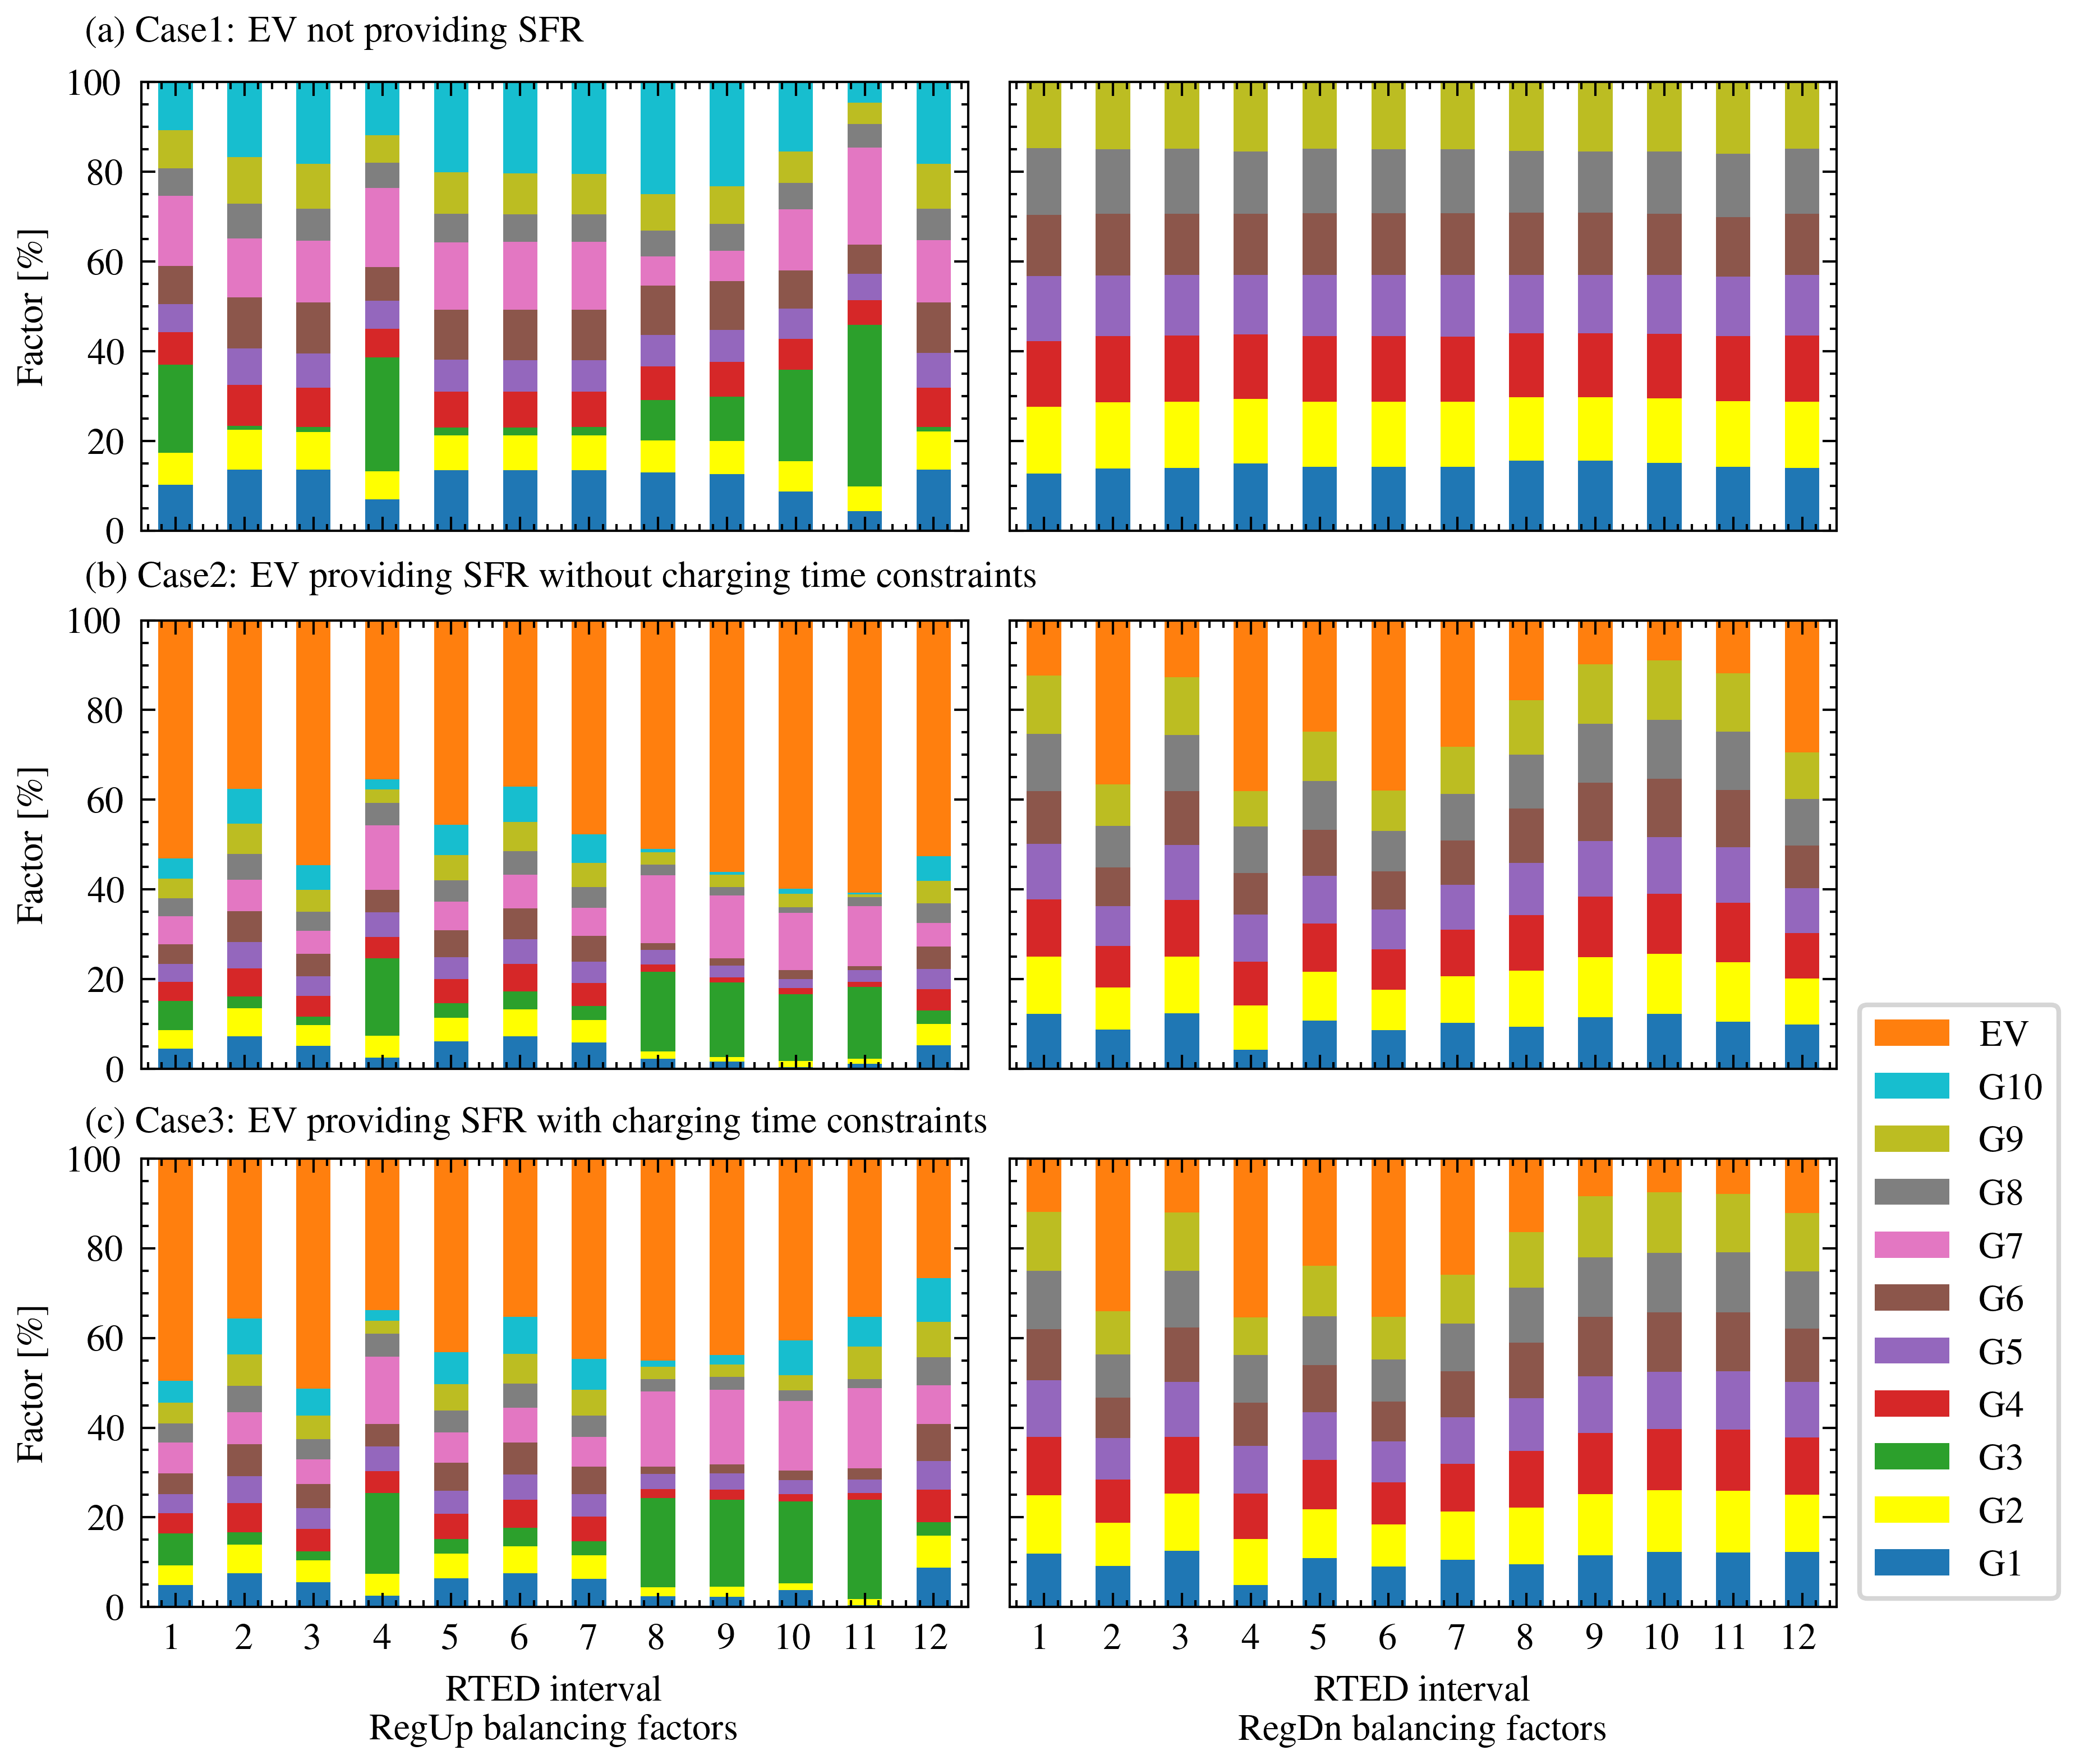

In [7]:
color = ['tab:blue', 'yellow', 'tab:green',
         'tab:red', 'tab:purple', 'tab:brown',
         'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange']
new_cols = ['PV_1', 'PV_2', 'PV_3', 'PV_4', 'PV_5', 'PV_6',
            'PV_7', 'PV_8', 'PV_9', 'Slack_10', 'PV_10']
label_g = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'EV']

def bf_plot(case_idx, bu_df, bd_df, ax1, ax2,
            new_cols=new_cols, label_g=label_g):
    ax1.grid(axis='y', zorder=-1)
    ax2.grid(axis='y', zorder=-1)
    bu_df[new_cols].plot.bar(stacked=True, ax=ax1, legend=False, color=color)
    bd_df[new_cols].plot.bar(stacked=True, ax=ax2, legend=False, color=color)
    for ax in [ax1, ax2]:
        ax.tick_params(axis='x', labelrotation = 0)
        ax.set_ylim([0, 1])
        ax.set_yticklabels([f'{int(i*100)}%' for i in np.arange(0, 1.1, 0.2)])
        ax.set_xticklabels([i for i in range(1,13,1)])
    return True

plt.style.use(['science','ieee'])
figs, axes = plt.subplots(3, 2, figsize=(6.5, 6), sharey='row', sharex='col')
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.05, hspace=0.2)

bf_plot(new_cols=new_cols, ax1=axes[0, 0], ax2=axes[0, 1], case_idx=1, bu_df=bu_dfs, bd_df=bd_dfs)
bf_plot(new_cols=new_cols, ax1=axes[1, 0], ax2=axes[1, 1],  case_idx=2, bu_df=bu_dffn, bd_df=bd_dffn)
bf_plot(new_cols=new_cols, ax1=axes[2, 0], ax2=axes[2, 1],  case_idx=3, bu_df=bu_dff, bd_df=bd_dff)

axes[2, 0].set_xlabel('RTED interval\nRegUp balancing factors')
axes[2, 1].set_xlabel('RTED interval\nRegDn balancing factors')

ylabel = 'Factor [\%]'
axes[0, 0].set_ylabel(ylabel)
axes[1, 0].set_ylabel(ylabel)
axes[2, 0].set_ylabel(ylabel)

title_x = 0.1
figs.text(x=title_x, y=0.9, s='(a) Case1: EV not providing SFR')
figs.text(x=title_x, y=0.63, s='(b) Case2: EV providing SFR without charging time constraints')
figs.text(x=title_x, y=0.36, s='(c) Case3: EV providing SFR with charging time constraints')

lines_labels = [ax.get_legend_handles_labels() for ax in [axes[2, 0], axes[2, 1]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
line_plot = lines[0:11]
line_plot.reverse()
label_g.reverse()
figs.legend(line_plot, label_g, frameon=True,
            loc='lower right', bbox_to_anchor=(0.51, 0.12, 0.5, 0.5))
# figs.suptitle('Balancing factor', x=0.12, y=0.07, fontsize=12)
figs.savefig('fig_bf.png', format='png')

In [8]:
# --- CPS score ---
epsilon = 18
k = 10 * ssa.ACEc.bias.v / epsilon / epsilon # mHz
length = 60

def cps_calc(df, k=k, length=length):
    """Calculate CPS score"""
    dfc = df.copy()
    dfc['Time'] = dfc['Time'] / length
    dfc['Time'] = dfc['Time'].astype(int)
    dfc = dfc.groupby('Time').mean()
    dfc['prod'] = 100 * (2 - k * dfc['ACE'] * dfc['fd'])
    return dfc

outscp = cps_calc(outs)
outfncp = cps_calc(outfn)
outfcp = cps_calc(outf)

# --- generation cost ---
def genc_calc(pgdf):
    """Calculate gen cost"""
    tc = 0
    for i in pgf.index:
        c = ssd.cost.c2.values * np.power(pgdf.loc[i].values / 12, 2) \
            + ssd.cost.c1.values * pgdf.loc[i].values
        tc += np.sum(c)
    tc += ssd.cost.c0.values * ssd.gen.u.values
    return tc.sum()

gtf = genc_calc(pgf)
gts = genc_calc(pgs)
gtfn = genc_calc(pgfn)

# --- SFR mileage cost ---
def sfrc_calc(agcf):
    """Calculate SFR mileage payment"""
    tc = 0
    for i in agcf.columns:
        c = agcf[i].values * 1.07  # $3/MWh mileage
        tc += np.sum(c)
    return tc.sum()

sms = sfrc_calc(agcs)
smfn = sfrc_calc(agcfn)
smf = sfrc_calc(agcf)

# --- ICT penalty and AGC payment to a car ---
def ictp_calc(df, agc_df, no_agc=False):
    """Calculate ICT penalty"""
    ict_df = df.copy()
    # calculate ict
    ict_df['ict'] = ict_df['na'] / ict_df['nam'] * ict_df['tt']
    ict_df['ict'][ict_df['ict'] < 0] = 0
    if no_agc:
        ict_df['ict'] = 0
    # scale up data
    ict_df[['tt', 'ict']] *= 60
    ict_df['rna'] = ict_df['nama'] / ict_df['nama'].sum()
    payment = sfrc_calc(agc_df) * agc_df.loc[9].sum() / agc_df.sum().sum()
    ict_df['pna'] = payment * ict_df['rna']  # payment to single EV
    ict_df['pict'] = (ict_df['ict'] - ict_df['tt']) * 4 / 60  # $2 per delayed hour
    ict_df['pict'][ict_df['pict'] <= 0] = 0
    pna = ict_df['pna'].sum()
    pict = ict_df['pict'].sum()
    return ict_df, pna, pict

ict_fn, pna_fn, pict_fn = ictp_calc(evdfn, agcfn)
ict_f, pna_f, pict_f = ictp_calc(evdf, agcf)
ict_s, pna_s, pict_s = ictp_calc(evds, agcs, no_agc=True)

# --- table ---
res_value = np.array([[outs['fd'].mean(), outfn['fd'].mean(), outf['fd'].mean()],
                      [outs['fd'].std(), outfn['fd'].std(), outf['fd'].std()],
                      [outs['ACE'].mean(), outfn['ACE'].mean(), outf['ACE'].mean()],
                      [outs['ACE'].std(), outfn['ACE'].std(), outf['ACE'].std()],
                      [outscp['prod'].mean(), outfncp['prod'].mean(), outfcp['prod'].mean()],
                      [agcs.sum().sum(), agcfn.sum().sum(), agcf.sum().sum()],
                      [agcs.loc[9].sum(), agcfn.loc[9].sum(), agcf.loc[9].sum()],
                      [gts, gtfn, gtf],
                      [sms, smfn, smf],
                      [pna_s, pna_f, pna_fn],
                      [pict_s, pict_fn, pict_f]])
res_df = pd.DataFrame(data=res_value,
                      columns=['Case1', 'Case2', 'Case3'])
Cat = ['Freq. Dev. mean [Hz]', 'Freq. Dev. Std. [Hz]',
       'ACE mean [MW]', 'ACE Std. [MW]',
       'CPS1 score', 'System AGC mileage [MWh]',
       'EV AGC mileage [MWh]', 'Generation cost [$]',
       'Milage payment [$]', 'Milage payment to EV[$]',
       'ICT compensation to EV [$]']
res_df.index = Cat
# res_df.loc['Total cost [$]'] = res_df.loc[Cat[6]] + res_df.loc[Cat[7]] + res_df.loc[Cat[10]]
res_df.round(5).style.format('{:,}')

,Case1,Case2,Case3
Freq. Dev. mean [Hz],-0.0,-1e-05,-1e-05
Freq. Dev. Std. [Hz],0.00623,0.006,0.00603
ACE mean [MW],-0.01521,-0.0522,-0.03912
ACE Std. [MW],21.77829,20.97947,21.07158
CPS1 score,153.08869,156.70854,156.26189
System AGC mileage [MWh],"8,277.79918","8,940.76994","8,864.53066"
EV AGC mileage [MWh],0.0,"2,043.33919","1,801.41695"
Generation cost [$],"133,031.39484","132,500.64676","132,556.21052"
Milage payment [$],"8,857.24512","9,566.62384","9,485.04781"
Milage payment to EV[$],0.0,"1,927.51614","2,186.37293"


In [9]:
np.set_printoptions(precision=5, suppress=True)
res_df.values

array([[    -0.     ,     -0.00001,     -0.00001],
       [     0.00623,      0.006  ,      0.00603],
       [    -0.01521,     -0.0522 ,     -0.03912],
       [    21.77829,     20.97947,     21.07158],
       [   153.08869,    156.70854,    156.26189],
       [  8277.79918,   8940.76994,   8864.53066],
       [     0.     ,   2043.33919,   1801.41695],
       [133031.39484, 132500.64676, 132556.21052],
       [  8857.24512,   9566.62384,   9485.04781],
       [     0.     ,   1927.51614,   2186.37293],
       [     0.     ,    846.1502 ,      0.00087]])

In [10]:
print(Cat)

['Freq. Dev. mean [Hz]', 'Freq. Dev. Std. [Hz]', 'ACE mean [MW]', 'ACE Std. [MW]', 'CPS1 score', 'System AGC mileage [MWh]', 'EV AGC mileage [MWh]', 'Generation cost [$]', 'Milage payment [$]', 'Milage payment to EV[$]', 'ICT compensation to EV [$]']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


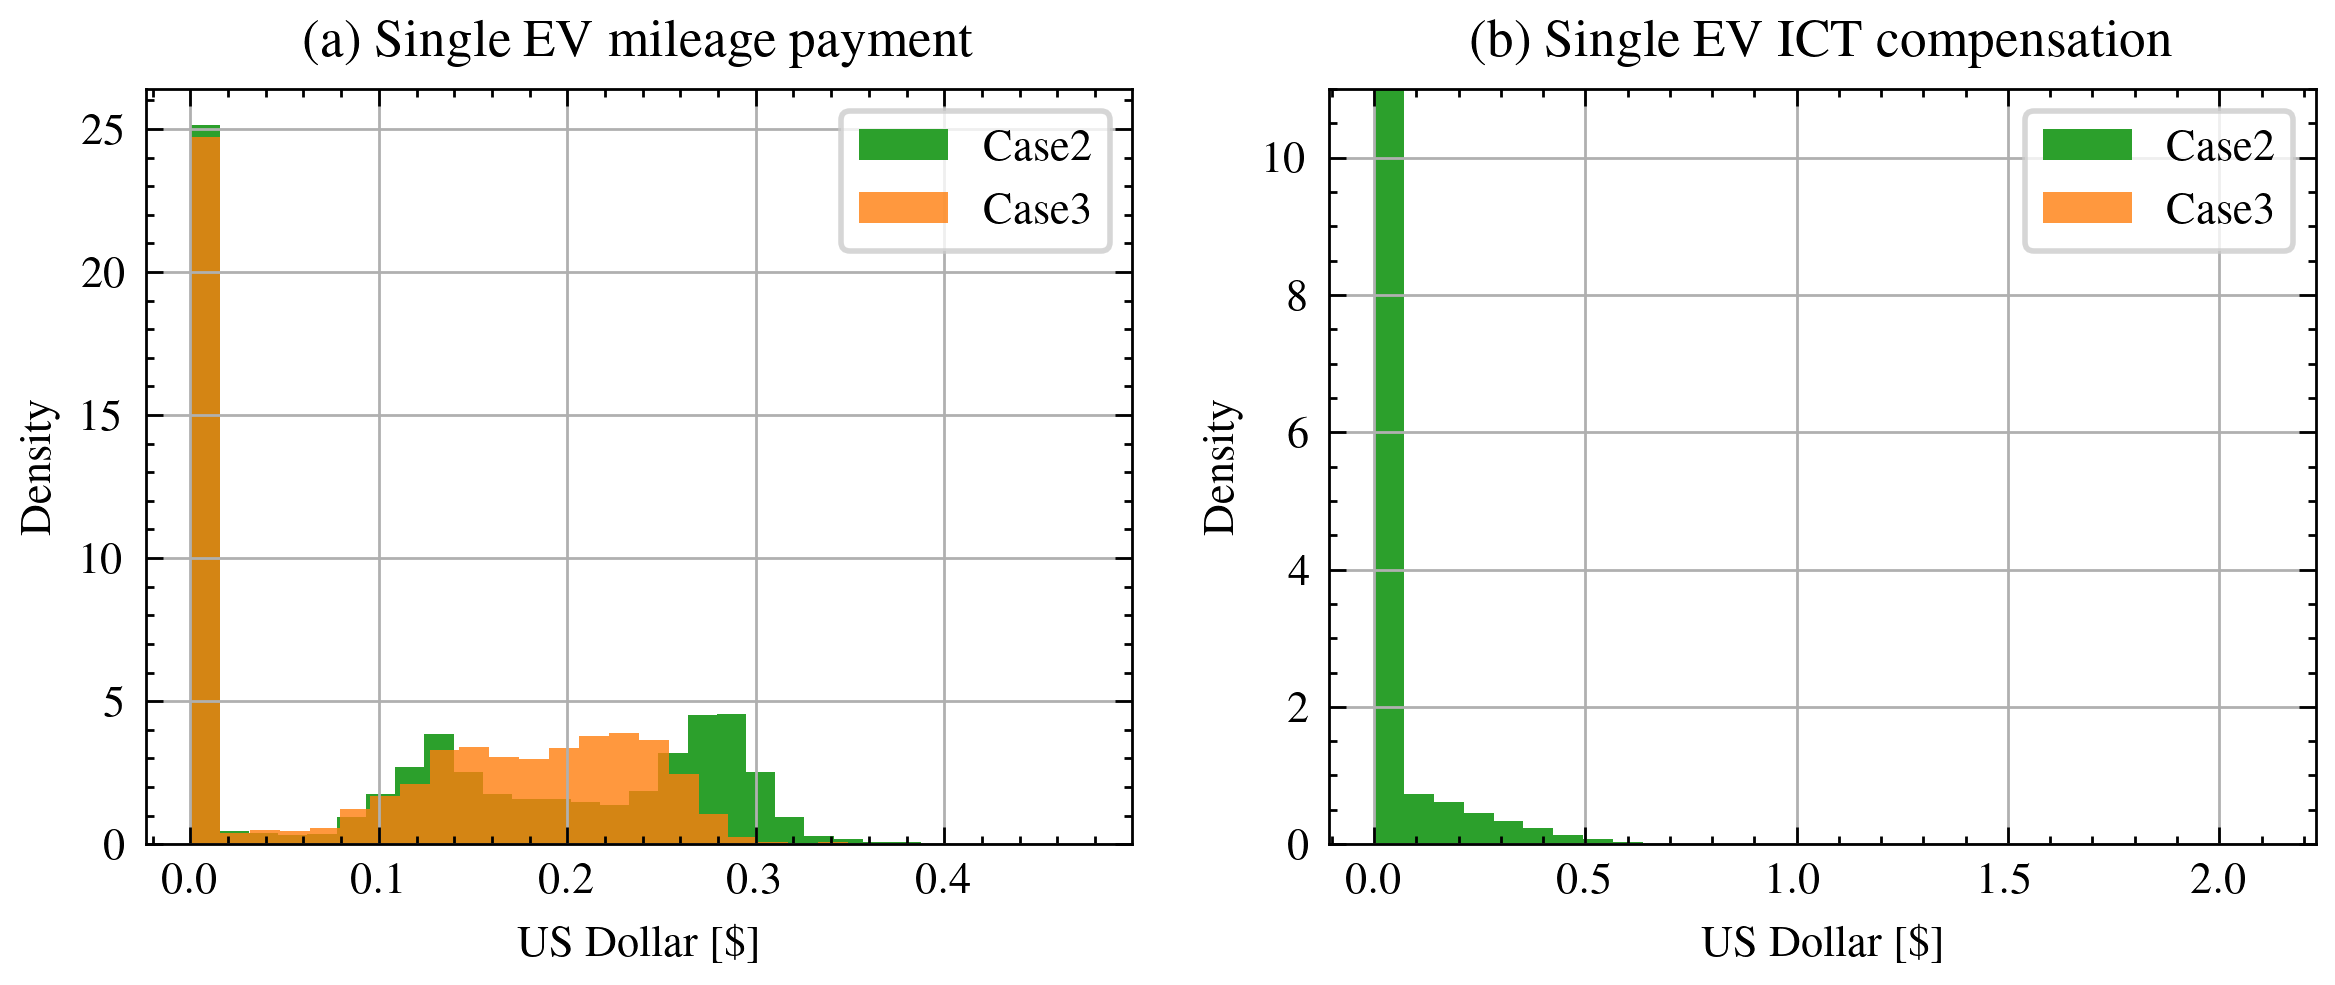

In [11]:
# # --- plot ---
fig_evp, ax_evp = plt.subplots(1, 2, figsize=(7, 2.5), dpi=400)
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.2, hspace=0.25)

ax, bins, density = ax_evp, 30, True
ict_fn['pna'].hist(ax=ax_evp[0], color='tab:green', label='Case2', bins=bins, density=density)
ict_f['pna'].hist(ax=ax_evp[0], color='tab:orange', label='Case3', bins=bins, density=density, alpha=0.8)
ax_evp[0].set_xlabel(r'US Dollar [\$]')
ax_evp[0].set_ylabel('Density')
ax_evp[0].legend(frameon=True)

ict_fn['pict'].hist(ax=ax_evp[1], color='tab:green', label='Case2', bins=bins, density=density)
ict_f['pict'].hist(ax=ax_evp[1], color='tab:orange', label='Case3', bins=bins, density=density, alpha=0.8)
ax_evp[1].set_xlabel(r'US Dollar [\$]')
ax_evp[1].set_ylabel('Density')
ax_evp[1].legend(frameon=True)
ax_evp[1].set_ylim([0, 11])

title_y_usd = 1
ax_evp[0].set_title('(a) Single EV mileage payment', y=title_y_usd)
ax_evp[1].set_title('(b) Single EV ICT compensation', y=title_y_usd)
fig_evp.savefig('fig_evpay.eps', format='eps')

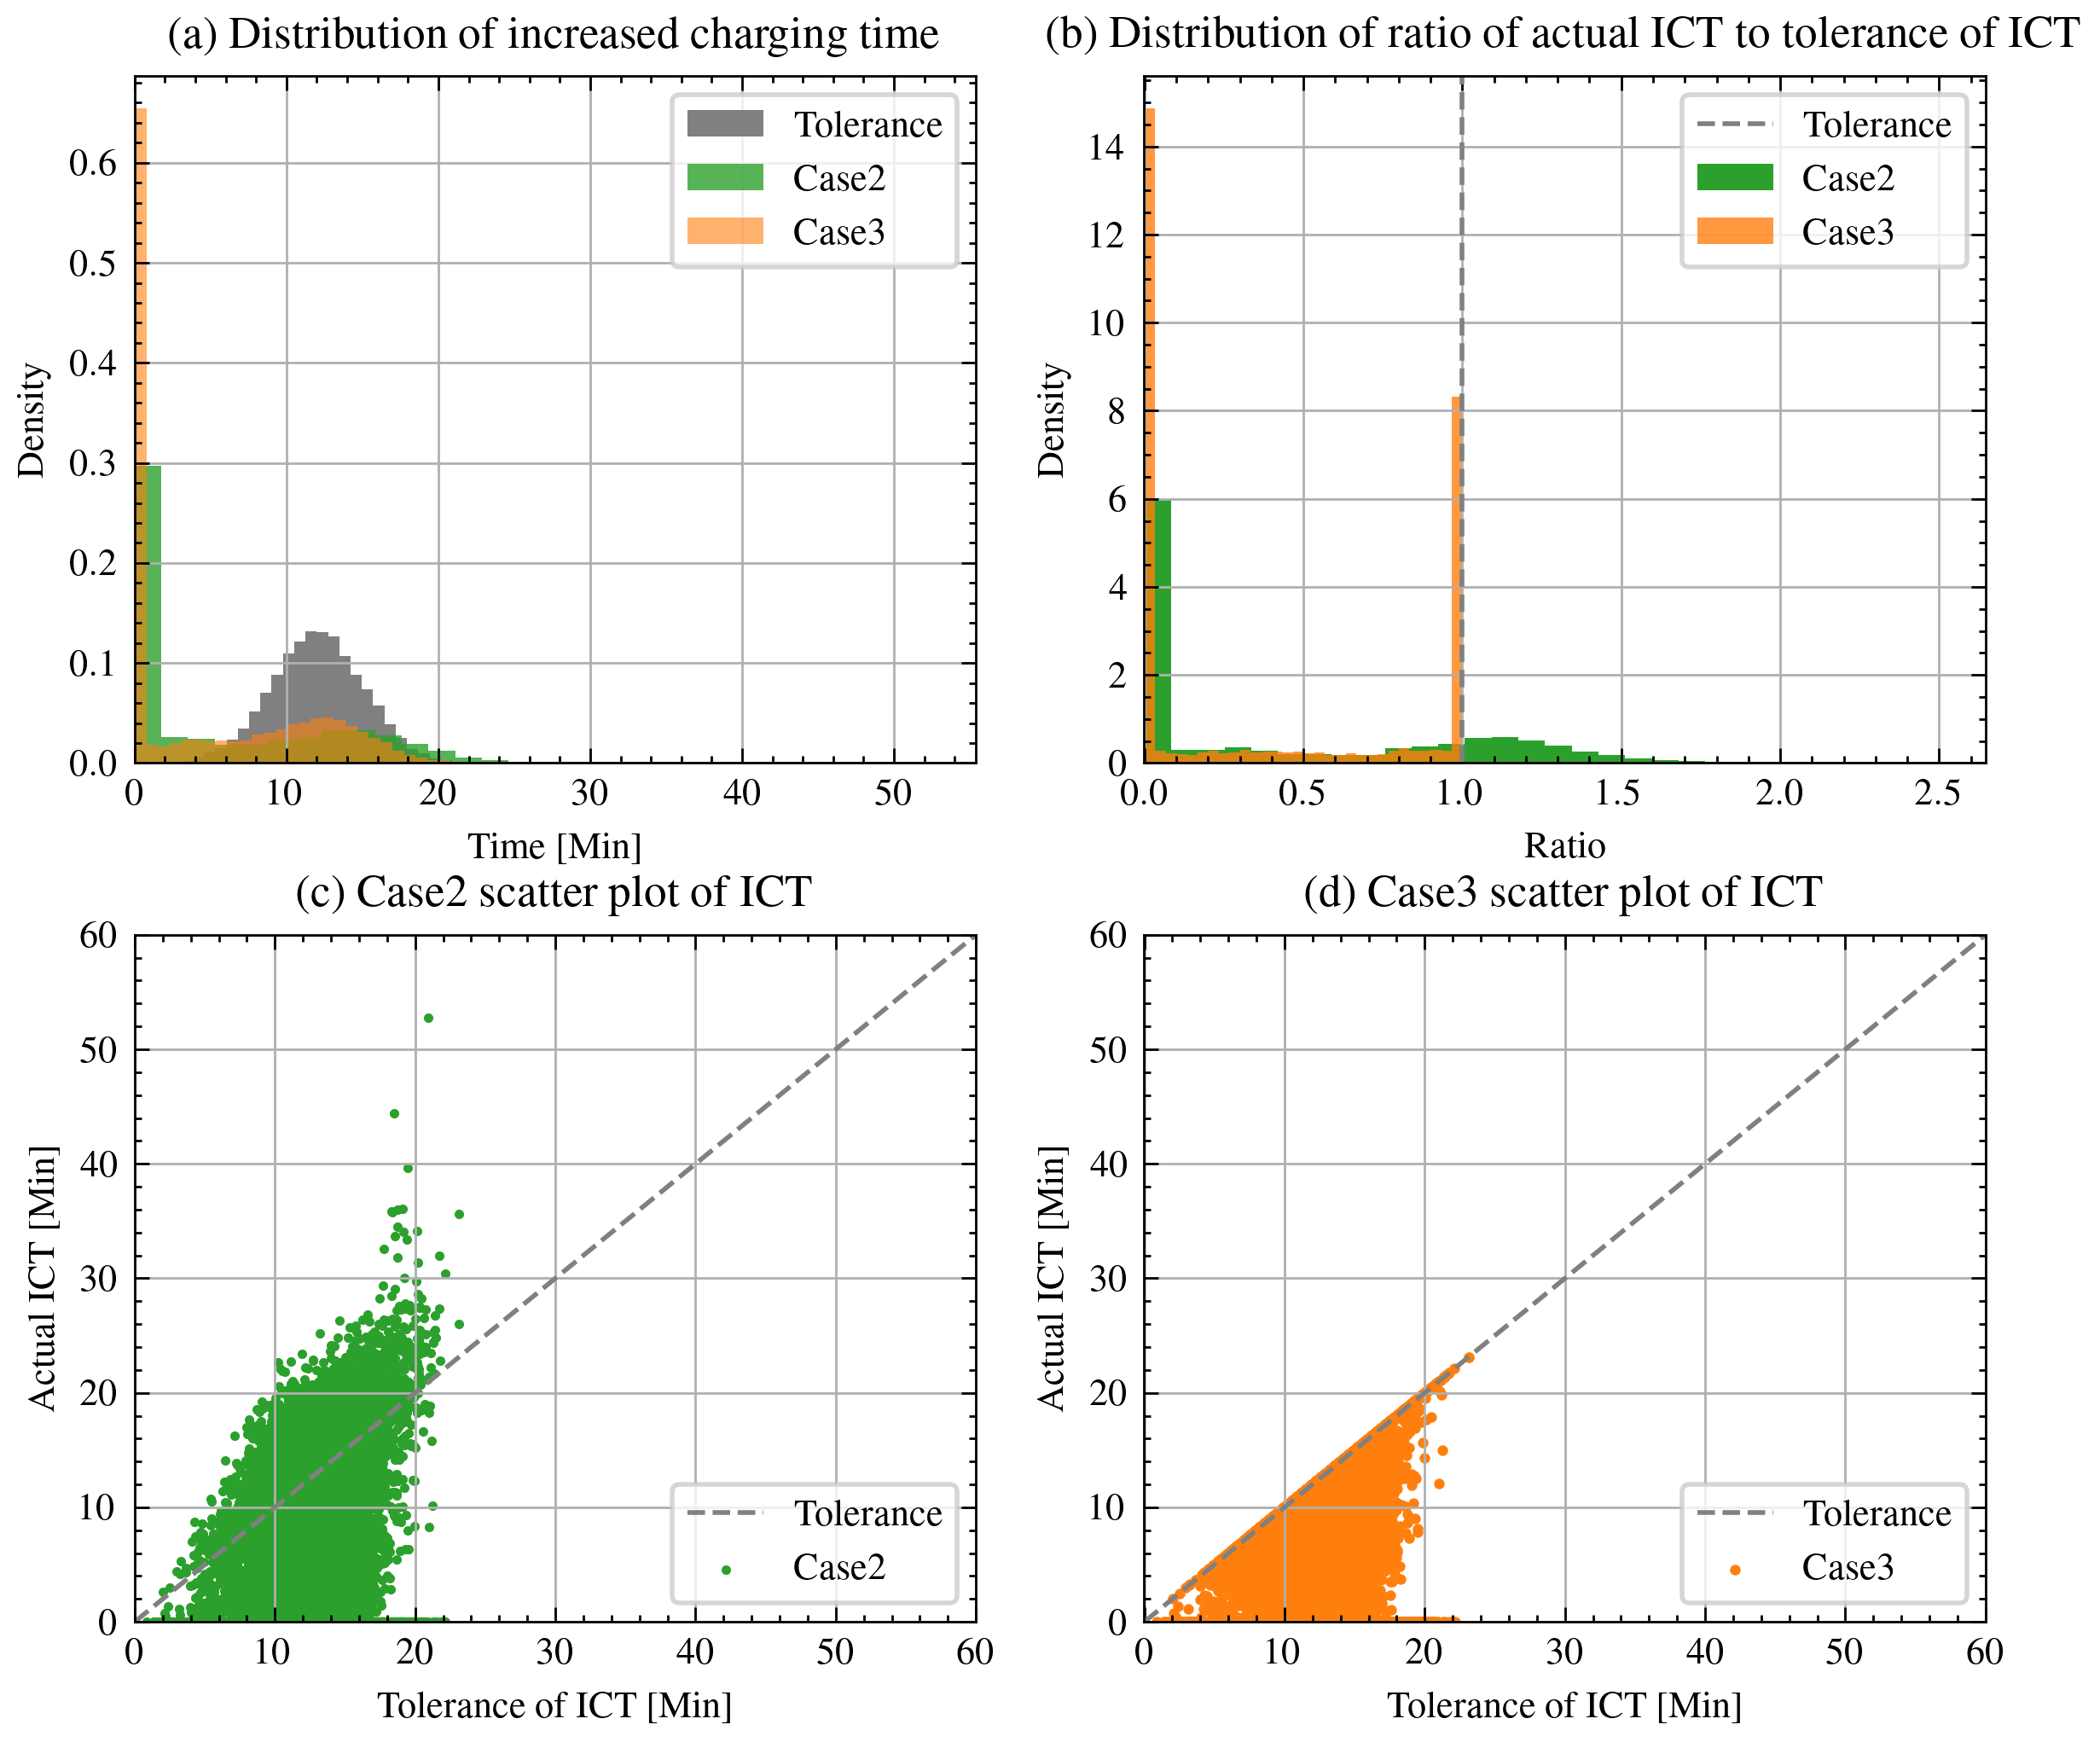

In [12]:
# --- calcualte ICT ---
evdfnp = evdfn.copy()
evdfp = evdf.copy()
# # # scale up data
evdfnp[['tt', 'ict']] *= 60
evdfp[['tt', 'ict']] *= 60
# # re-calculate ict
evdfnp['ict'] = evdfnp['na'] / evdfnp['nam'] * evdfnp['tt']
evdfnp['ict'][evdfnp['ict'] < 0] = 0
evdfp['ict'] = evdfp['na'] / evdfp['nam'] * evdfp['tt']
evdfp['ict'][evdfp['ict'] < 0] = 0

# # ratio of ict
evdfnp['rict'] = evdfnp['ict'] / evdfnp['tt']
evdfp['rict'] = evdfp['ict'] / evdfp['tt']

plt.style.use(['science','ieee'])
# # --- plot ---
fig_ict, ax_ict = plt.subplots(2, 2, figsize=(7, 6), dpi=400)
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.2, hspace=0.25)

# --- plot1 ---
ax, bins, density = ax_ict[0, 0], 30, True
evdfnp['tt'].hist(ax=ax, color='grey', label='Tolerance', bins=bins, density=density)
evdfnp['ict'].hist(ax=ax, color='tab:green', label='Case2', bins=bins, density=density, alpha=0.8)
evdfp['ict'].hist(ax=ax, color='tab:orange', label='Case3', bins=bins, density=density, alpha=0.6)
ax.grid(which='major', ls='-')
ax.legend(frameon=True)
ax.set_xlim([-0.001, None])
ax.set_xlabel('Time [Min]')
ax.set_ylabel('Density')

# --- plot2 ---
ax, bins, density = ax_ict[0, 1], 30, True
ax.axvline(x=1, label='Tolerance', color='grey', linestyle='--')
evdfnp['rict'].hist(ax=ax, color='tab:green', label='Case2', bins=bins, density=density)
evdfp['rict'].hist(ax=ax, color='tab:orange', label='Case3', bins=bins, density=density, alpha=0.8)
ax.grid(which='major', ls='-')
ax.legend(frameon=True)
ax.set_xlim([-0.001, None])
ax.set_xlabel('Ratio')
ax.set_ylabel('Density')

# --- plot3,4 ---
ax, s, marker, x, y = ax_ict[1, 0], 1, 'o', 'tt', 'ict'
xmax, xmin, loc =  60, -0.01, 'bottom'

ax.plot([xmin, xmax], [xmin, xmax], label='Tolerance', color='grey', linestyle='--')
evdfnp.plot.scatter(x=x, y=y, s=s, marker=marker, ax=ax,
                    c='tab:green', label='Case2')
ax.grid(which='major', ls='-')
ax.legend(frameon=True, loc='lower right')
ax.set_xlim([xmin, xmax])
ax.set_ylim([xmin, xmax])
ax.set_xlabel('Tolerance of ICT [Min]')
ax.set_ylabel('Actual ICT [Min]')

ax, s, marker, x, y, xmax, xmin = ax_ict[1, 1], 1.5, 'o', 'tt', 'ict', 60, -0.01
ax.plot([xmin, xmax], [xmin, xmax], label='Tolerance', color='grey', linestyle='--')
evdfp.plot.scatter(x=x, y=y, s=s, marker=marker, ax=ax,
                   c='tab:orange', label='Case3')
ax.grid(which='major', ls='-')
ax.legend(frameon=True, loc='lower right')
ax.set_xlim([xmin, xmax])
ax.set_ylim([xmin, xmax])
ax.set_xlabel('Tolerance of ICT [Min]')
ax.set_ylabel('Actual ICT [Min]')

# title
title_y = 1
ax_ict[0, 0].set_title('(a) Distribution of increased charging time', y=title_y)
ax_ict[0, 1].set_title('(b) Distribution of ratio of actual ICT to tolerance of ICT', y=title_y)
ax_ict[1, 0].set_title('(c) Case2 scatter plot of ICT', y=title_y)
ax_ict[1, 1].set_title('(d) Case3 scatter plot of ICT', y=title_y)
ax_ict_yrange = [0, 60]
ax_ict[1, 0].set_ylim(ax_ict_yrange)
ax_ict[1, 1].set_ylim(ax_ict_yrange)
fig_ict.savefig('fig_ict.pdf', format='pdf')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


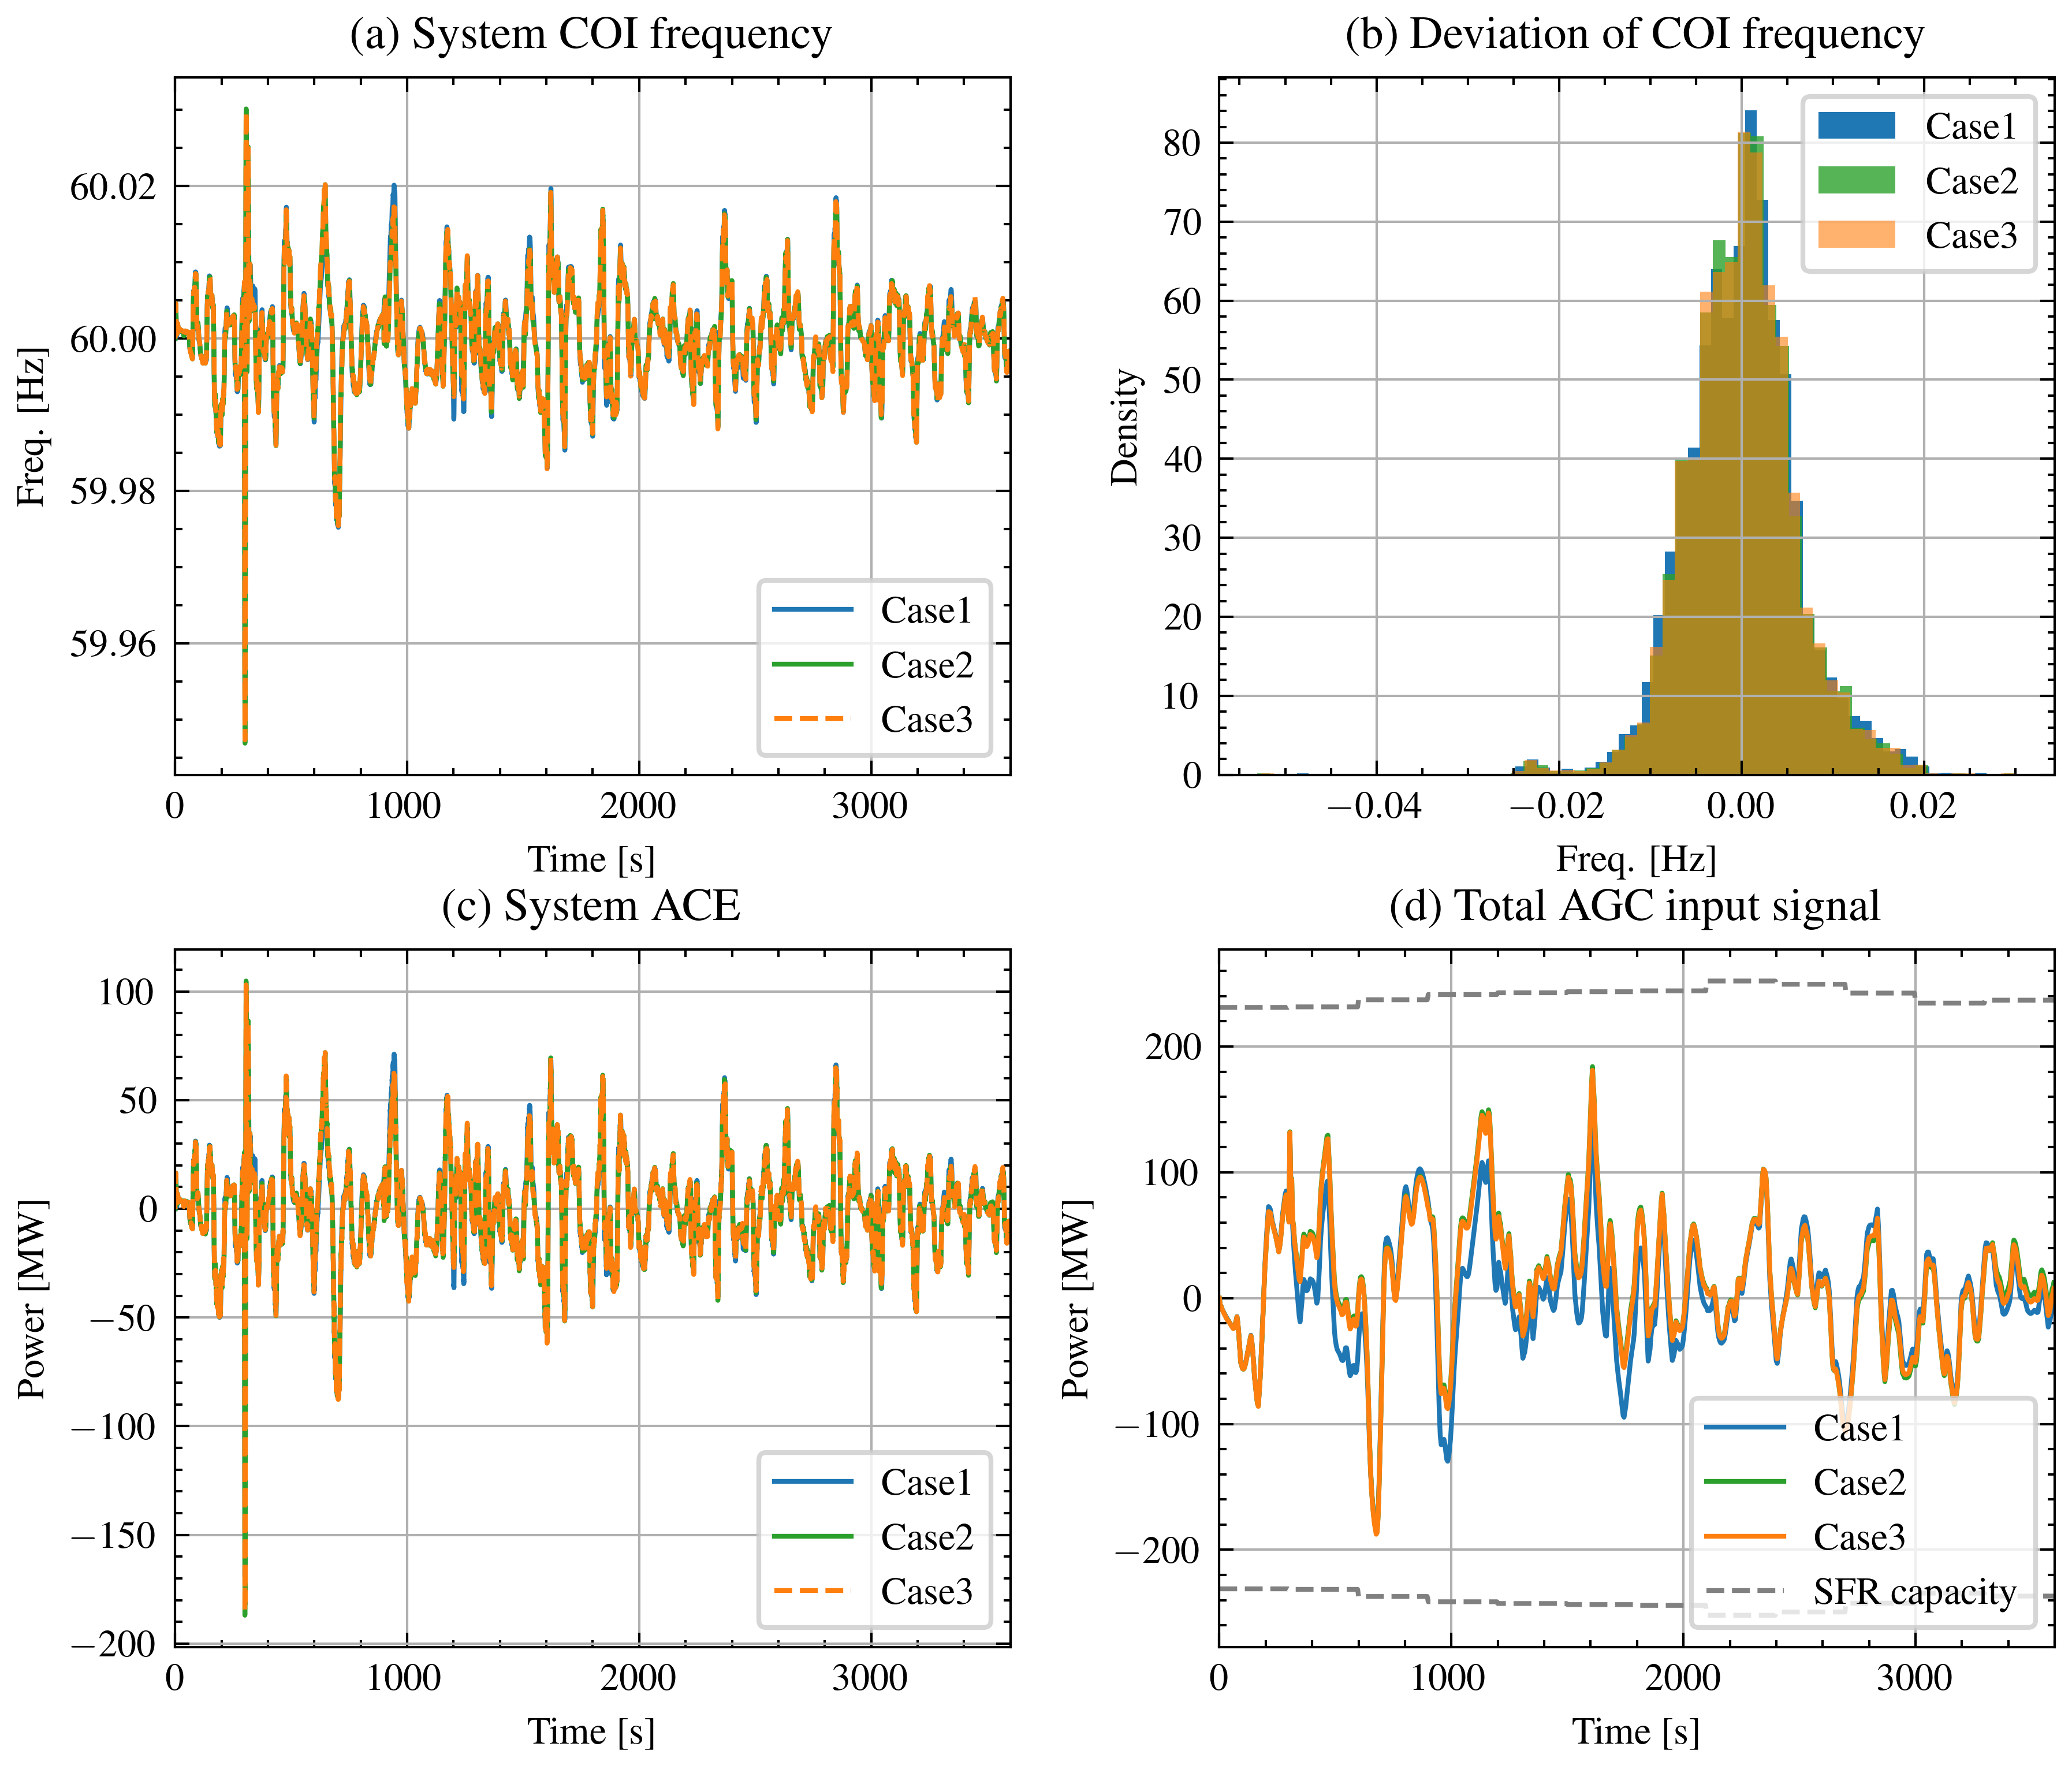

In [13]:
plt.style.use(['science','ieee'])
fig_dyn, ax_dyn = plt.subplots(2, 2, figsize=(7, 6))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.25, hspace=0.25)

# COI freq.
x, y, fig, ax_plt = 'Time', 'freq', fig_dyn, ax_dyn[0, 0]
outs.plot(x='Time', y='freq', ax=ax_plt, fig=fig, label='Case1', linestyle='-', color='tab:blue')
outfn.plot(x='Time', y='freq', ax=ax_plt, fig=fig, label='Case2', linestyle='-', color='tab:green')
outf.plot(x='Time', y='freq', ax=ax_plt, fig=fig, label='Case3',
          linestyle='--', color='tab:orange', grid=True, )
ax_plt.legend(frameon=True)
ax_plt.set_xlim([0, 3600])
ax_plt.set_ylabel('Freq. [Hz]')
ax_plt.set_xlabel('Time [s]')

# COI std.
x, y, kind, legend, linewidth, fig, ax_plt = 'Time', 'fd', 'hist', False, 1, fig_dyn, ax_dyn[0, 1]
bins, density = 60, True
outs.plot(x=x, y=y, kind=kind, color='tab:blue', alpha=1, bins=bins, density=density,
          legend=legend, linewidth=linewidth, fig=fig, ax=ax_plt, label='Case1')
outfn.plot(x=x, y=y, kind=kind, color='tab:green', alpha=0.8, bins=bins, density=density,
          legend=legend, linewidth=linewidth, fig=fig, ax=ax_plt, label='Case2')
outf.plot(x=x, y=y, kind=kind, color='tab:orange', alpha=0.6, bins=bins, density=density,
          legend=legend, linewidth=linewidth, fig=fig, ax=ax_plt, label='Case3', grid=True)
ax_plt.legend(frameon=True)
ax_plt.set_ylabel('Density')
ax_plt.set_xlabel('Freq. [Hz]')

# ACE
x, y, fig, ax_plt = 'Time', 'ACE', fig_dyn, ax_dyn[1, 0]
outs.plot(x=x, y=y, ax=ax_plt, fig=fig, label='Case1', linestyle='-', color='tab:blue')
outfn.plot(x=x, y=y, ax=ax_plt, fig=fig, label='Case2', linestyle='-', color='tab:green')
outf.plot(x=x, y=y, ax=ax_plt, fig=fig, label='Case3', linestyle='--', color='tab:orange', grid=True)
ax_plt.legend(frameon=True)
ax_plt.set_xlim([0, 3600])
ax_plt.set_ylabel('Power [MW]')
ax_plt.set_xlabel('Time [s]')

# AGC control
x, y, kind, legend, linewidth, fig, ax_plt = 'Time', 'fd', 'kde', False, 1, fig_dyn, ax_dyn[1, 1]
sfrs.plot(x='time', y='ace', ax=ax_plt, fig=fig, label='Case1', linestyle='-', color='tab:blue')
sfrfn.plot(x='time', y='ace', ax=ax_plt, fig=fig, label='Case2', linestyle='-', color='tab:green')
sfrf.plot(x='time', y='ace', ax=ax_plt, fig=fig, label='Case3', linestyle='-', color='tab:orange', grid=True)
ax_plt.legend(frameon=True)

legend, linestyle, color = False, '--', 'grey'
sfrs.plot(x='time', y='up', ax=ax_plt, fig=fig, linestyle=linestyle, color=color, legend=legend)
sfrs.plot(x='time', y='dn', ax=ax_plt, fig=fig, linestyle=linestyle, color=color, legend=legend, grid=True)
ax_plt.set_xlim([0, 3600])
ax_plt.set_xlabel('Time [s]')
ax_plt.set_ylabel('Power [MW]')
ax_plt.legend(['Case1', 'Case2', 'Case3', 'SFR capacity'], frameon=True, loc='lower right')

# title
title_y = 1
ax_dyn[0, 0].set_title('(a) System COI frequency', y=title_y)
ax_dyn[0, 1].set_title('(b) Deviation of COI frequency', y=title_y)
ax_dyn[1, 0].set_title('(c) System ACE', y=title_y)
ax_dyn[1, 1].set_title('(d) Total AGC input signal', y=title_y)
fig_dyn.savefig('fig_dyn.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


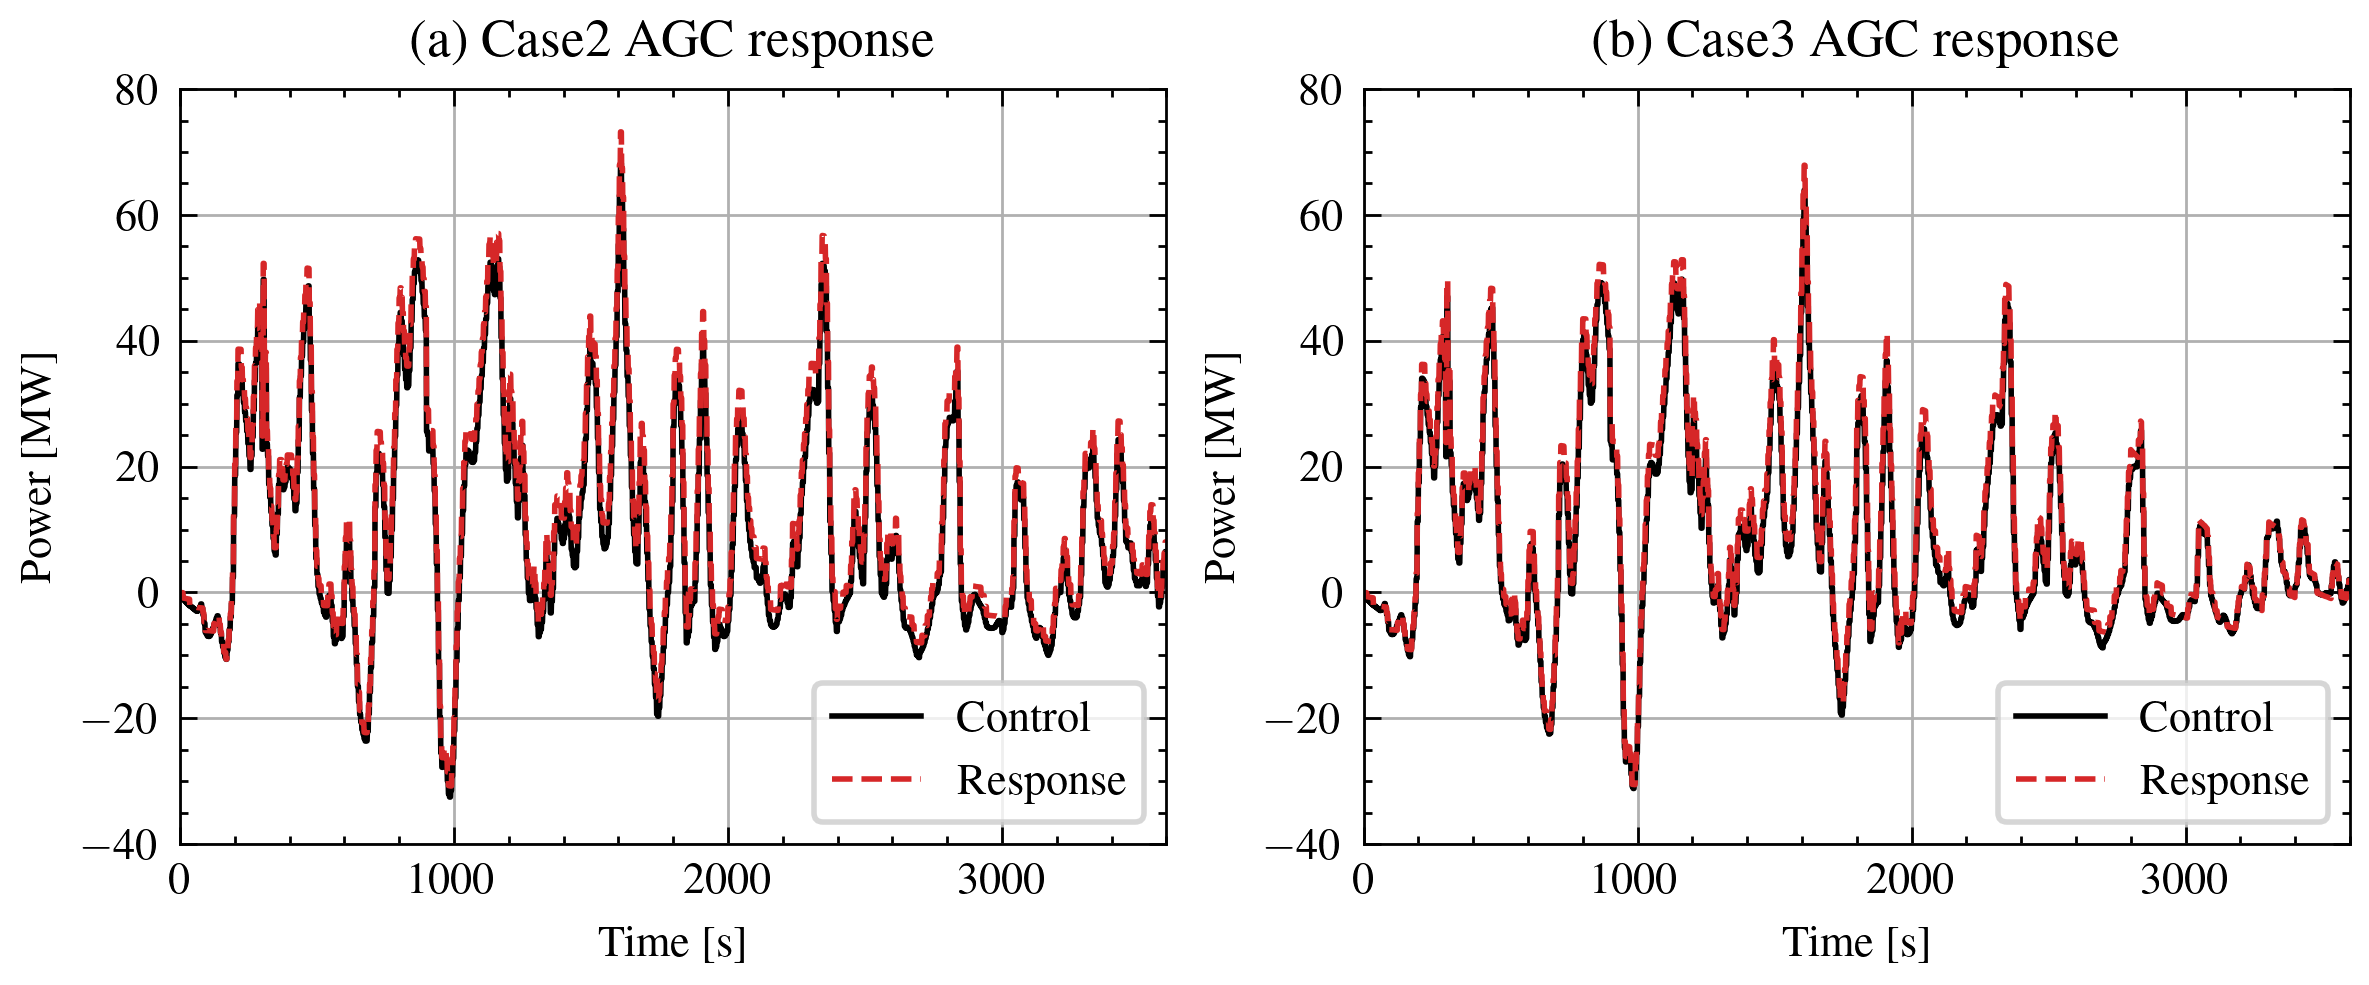

In [14]:
plt.style.use(['science','ieee'])
fig_evr, ax_evr = plt.subplots(1, 2, figsize=(7, 2.5), dpi=400, sharey=False)
loc = 'lower right'
evfn.plot(y='Pi', ax=ax_evr[0], color='black', label='Control')
evfn.plot(y='Prc', ax=ax_evr[0], color='tab:red', linestyle='--', label='Response', grid=True)
evf.plot(y='Pi', ax=ax_evr[1], color='black', linestyle='-', label='Control')
evf.plot(y='Prc', ax=ax_evr[1], color='tab:red', linestyle='--', label='Response', grid=True)
for a in ax_evr:
    a.set_xlim([0, 3600])
    a.set_ylim([-40, 80])
    a.legend(loc=loc, frameon=True)
    a.set_ylabel('Power [MW]')
    a.set_xlabel('Time [s]')

title_y = 1
ax_evr[0].set_title('(a) Case2 AGC response', y=title_y)
ax_evr[1].set_title('(b) Case3 AGC response', y=title_y)
fig_evr.savefig('fig_evr.eps', format='eps')

/Users/jinningwang/Documents/work/mambaforge/envs/andes/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


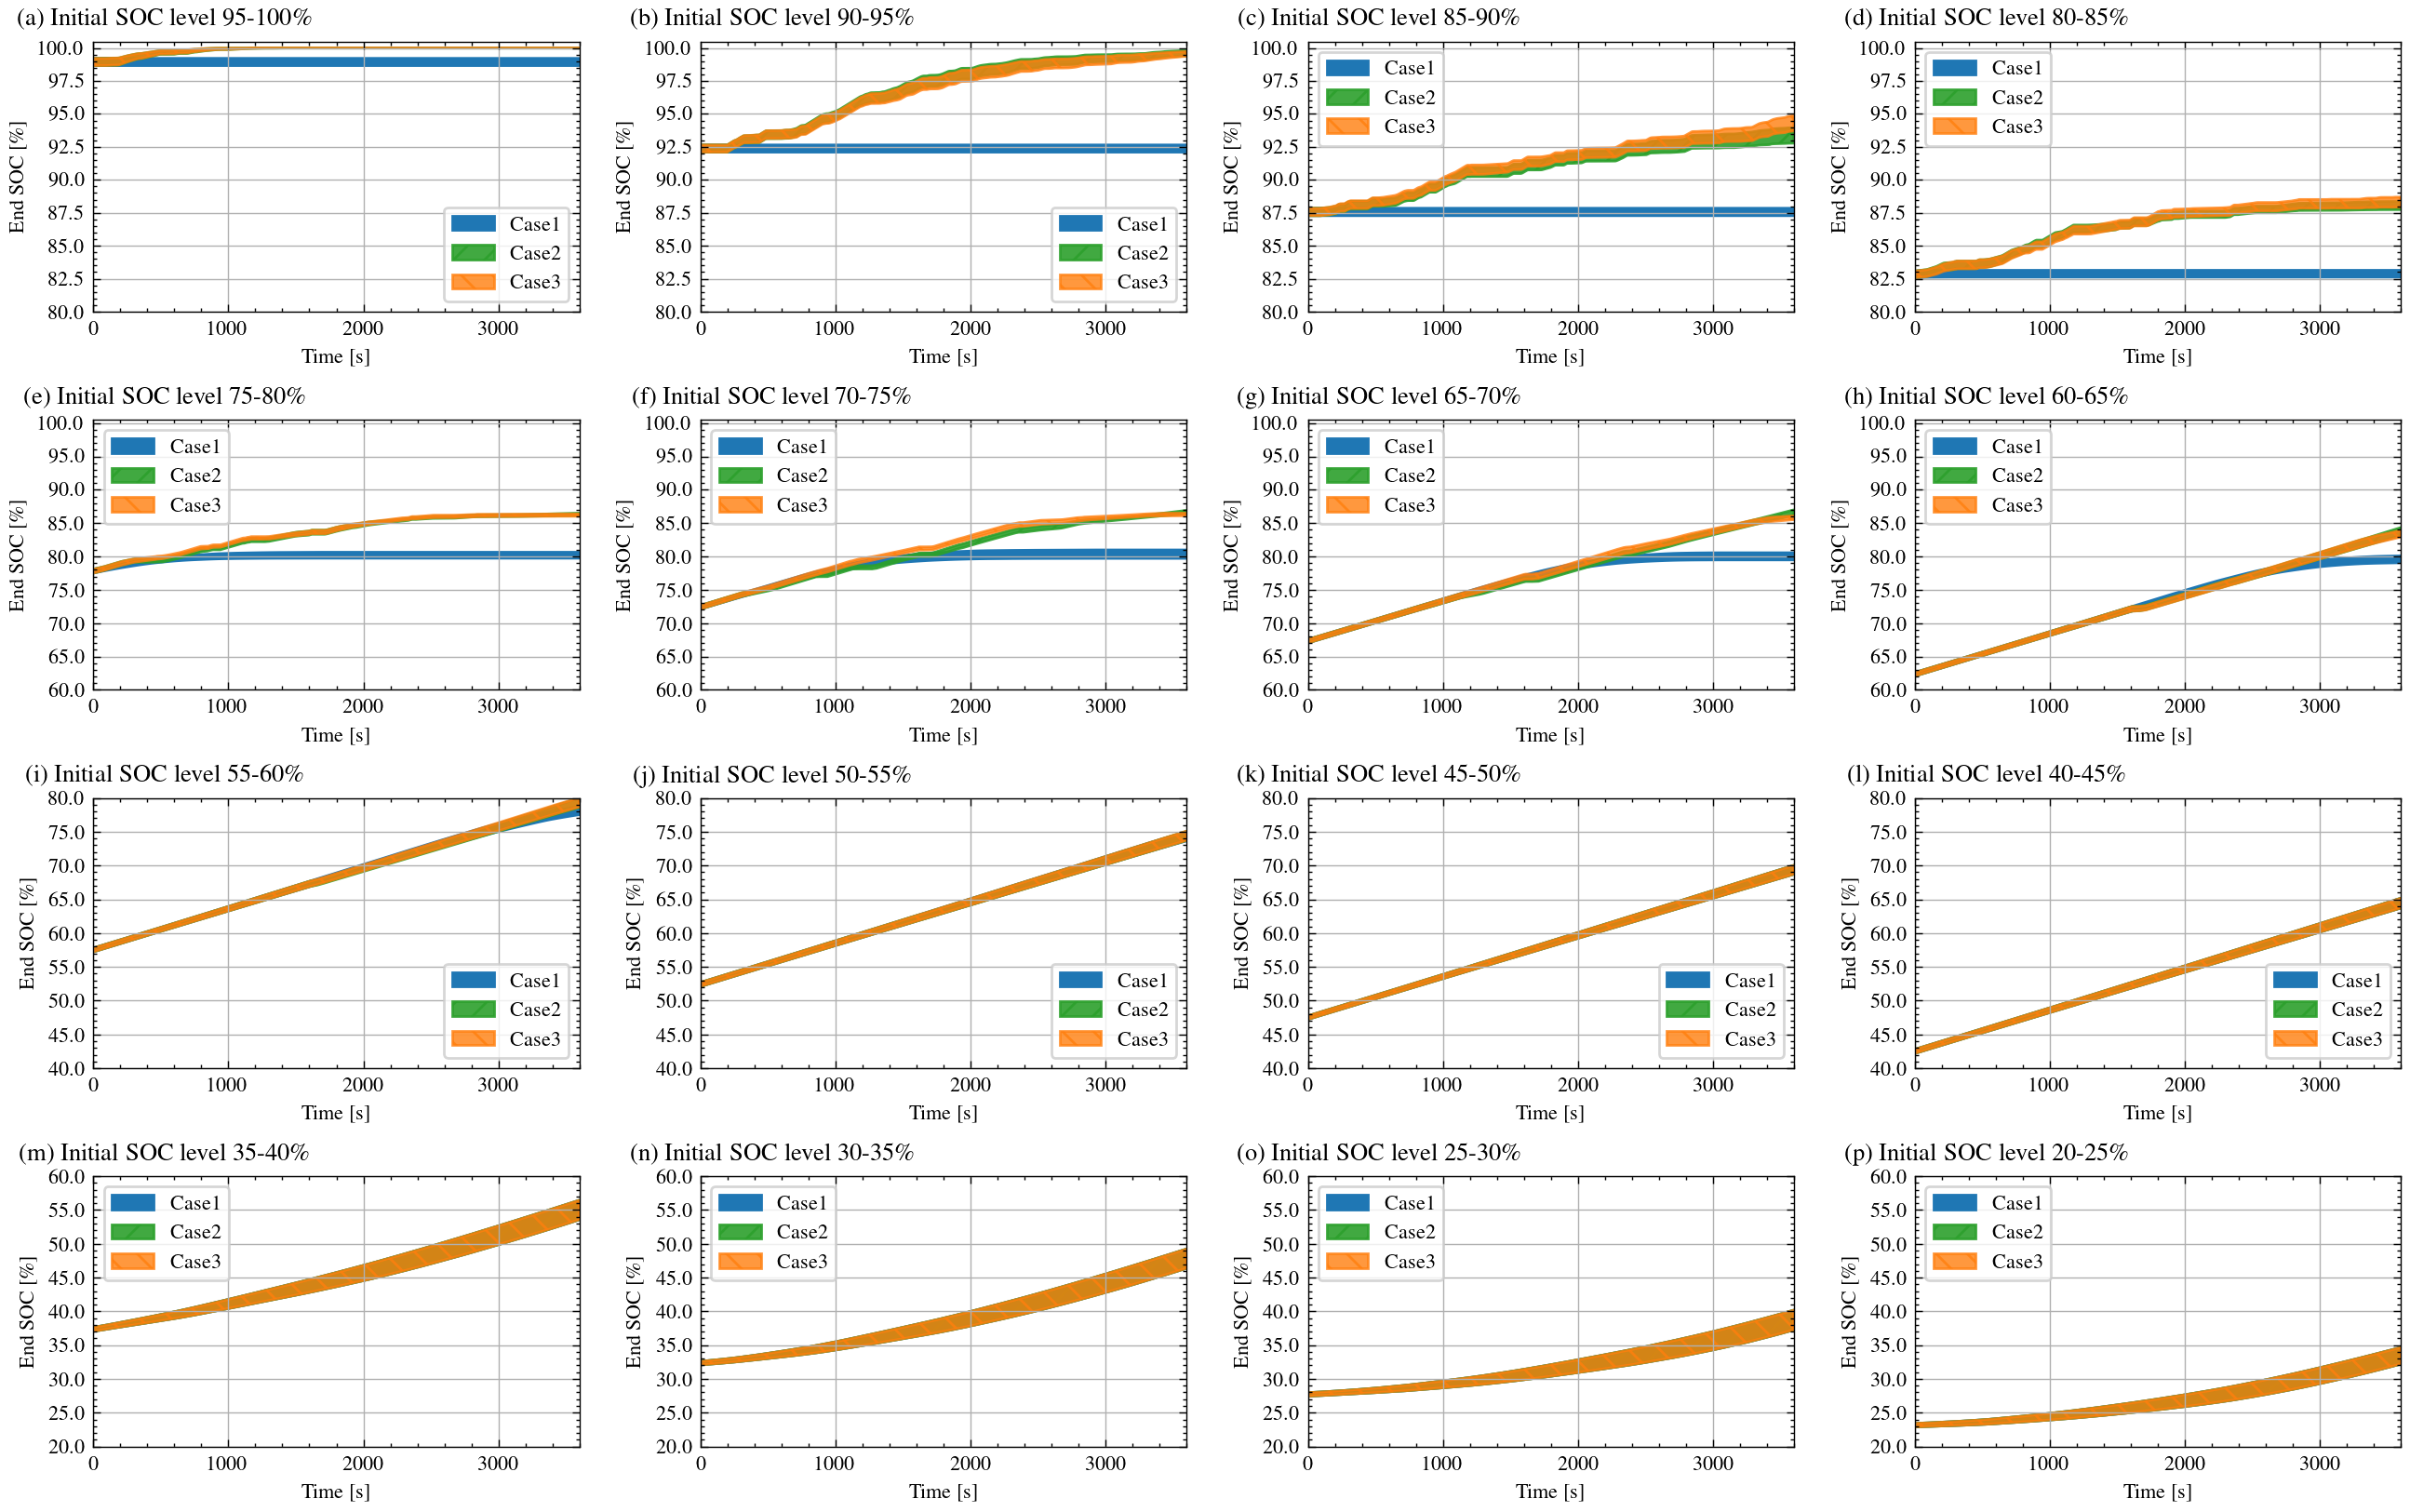

In [17]:
col_index = []
for k in range(0, 16):
    col_index = col_index + [list(np.array(range(0, 100)) + 100*k)]
col = []
for c in col_index:
    col = col + [list(evsocf.columns[[c]].values)]

plt.style.use(['science','ieee'])
fig_soc, ax_soc = plt.subplots(4, 4, figsize=(16, 10), dpi=200)
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.25, hspace=0.4)

alpha=0.8
ax = ax_soc
liml = [0.8, 0.6, 0.4, 0.2]
limr = [1.005, 1.005, 0.8, 0.6]
for i in range(4):
    for j in range(4):
        idx = 15 - (4*i + j)
        ax[i, j].fill_between(range(3600), linestyle='-', color='tab:blue',
                              hatch='||', alpha=1, label=f'Case1',
                              y1=evsocs[col[idx]].mean(axis=1) + 1.96 * evsocs[col[idx]].sem(axis=1),
                              y2=evsocs[col[idx]].mean(axis=1) - 1.96 * evsocs[col[idx]].sem(axis=1))
        ax[i, j].fill_between(range(3600), linestyle='-', color='tab:green',
                              hatch='//', alpha=0.9, label=f'Case2',
                              y1=evsocfn[col[idx]].mean(axis=1) + 1.96 * evsocfn[col[idx]].sem(axis=1),
                              y2=evsocfn[col[idx]].mean(axis=1) - 1.96 * evsocfn[col[idx]].sem(axis=1))
        ax[i, j].fill_between(range(3600), linestyle='-', color='tab:orange',
                              hatch='\\\\', alpha=0.8, label=f'Case3',
                              y1=evsocf[col[idx]].mean(axis=1) + 1.96 * evsocf[col[idx]].sem(axis=1),
                              y2=evsocf[col[idx]].mean(axis=1) - 1.96 * evsocf[col[idx]].sem(axis=1))
        ax[i, j].grid(which='major', ls='-')
        ax[i, j].set_xlim([0, 3600])
        ax[i, j].set_xlabel('Time [s]')
        ax[i, j].set_ylabel(r'End SOC [\%]')
        ax_label = f'({chr(97 + 15 - idx)}) Initial SOC level {idx*5+20}-{idx*5+25}'+r'\%'
        ax[i, j].set_title(x=0.15, y=1, label=ax_label)
        # --- yrange ---
        ax[i, j].set_ylim([liml[i], limr[i]])
        # --- yticks ---
        if i == 0:
            yticks = np.arange(liml[i], limr[i]+0.025, 0.025)
        else:
            yticks = np.arange(liml[i], limr[i]+0.06, 0.05)
        ax_yticks = ax[i, j].set_yticks(yticks[0:-1], [np.round(ytk*100, 4) for ytk in yticks[0:-1]])
        # --- legend ---
        if idx >= 14:
            ax[i, j].legend(frameon=True, loc='lower right')
        elif idx >= 8:
            ax[i, j].legend(frameon=True, loc='upper left')
        elif idx >= 4:
            ax[i, j].legend(frameon=True, loc='lower right')
        else:
            ax[i, j].legend(frameon=True, loc='upper left')

fig_soc.savefig('fig_soc.pdf', format='pdf')